Import necessary libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 
from sklearn.preprocessing import StandardScaler, LabelEncoder 

Load the dataset titanic

In [2]:
titanic = pd.read_csv('Titanic-Dataset.csv')

 Preprocess the data by dropping unnecessary columns

In [3]:
titanic.drop(['Cabin', 'Ticket', 'Name', 'PassengerId'], axis=1, inplace=True)

 Fill missing values in field name Age with the median value

In [4]:
median_age = titanic['Age'].median()
titanic['Age'] = titanic['Age'].fillna(median_age)

Fill missing values in field name Embarked with the most common value

In [5]:
titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])


Encode categorical variables to numerical values

In [6]:
label_encoder = LabelEncoder()
titanic['Sex'] = label_encoder.fit_transform(titanic['Sex'])
titanic['Embarked'] = label_encoder.fit_transform(titanic['Embarked'])

 Define features and target variable

In [7]:
X = titanic.drop('Survived', axis=1)
Y = titanic['Survived']

Split the data into training and testing sets

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Normalize these data

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Initialize and train the SVM model

In [10]:
svm = SVC(kernel='linear')
svm.fit(X_train_scaled, Y_train)

SVC(kernel='linear')

Make prediction and evaluate the model

In [11]:
Y_pred = svm.predict(X_test_scaled)

Calculate accuracy using confusion_matrix

In [12]:
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy:.2f}')
conf_matrix = confusion_matrix(Y_test, Y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.78
Confusion Matrix:
[[88 17]
 [22 52]]


Visualize the confusion_matrix

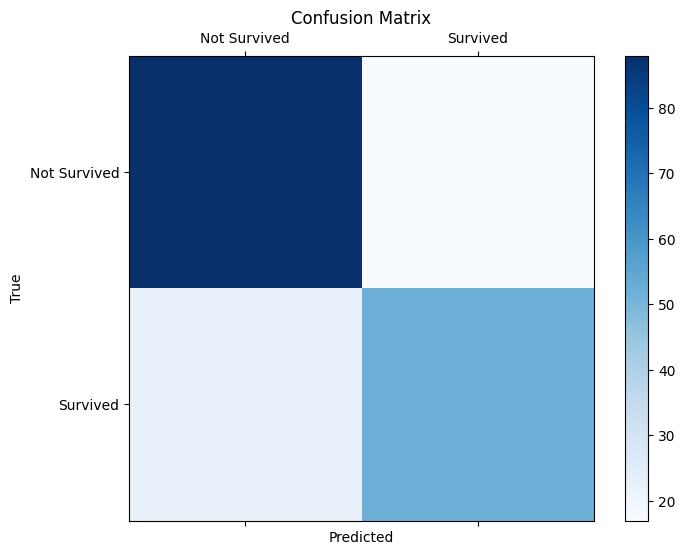

In [13]:
plt.figure(figsize=(8, 6))
plt.matshow(conf_matrix, cmap=plt.cm.Blues, fignum=1)
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.yticks([0, 1], ['Not Survived', 'Survived'])
plt.title('Confusion Matrix')
plt.show()

Displaying classification report

In [14]:
class_report = classification_report(Y_test, Y_pred)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       105
           1       0.75      0.70      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179

